In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
proj_dir = Path("Data/r77-mini-data-fortnight")
print(proj_dir.joinpath("input"))

data_dir = proj_dir
input_dir = data_dir.joinpath("input")
fixed_input_dir = input_dir.joinpath("fixed")
temporal_input_dir = input_dir.joinpath("temporal")
target_dir = data_dir.joinpath("target")
fixed_target_dir = target_dir.joinpath("fixed")
temporal_target_dir = target_dir.joinpath("temporal")

Data/r77-mini-data-fortnight/input


In [4]:
files = list(temporal_target_dir.iterdir())

index_dir = Path("Index")
files_index = list(index_dir.iterdir())
indices = np.load(files_index[0]).squeeze()

#First hour of data
index = indices[0]
tt = np.load(files[index]).squeeze()
tt.shape

(144, 70, 100, 3)

In [5]:
transposed_tt = np.transpose(tt, (0, 2, 3, 1))

reshaped_tt = transposed_tt.reshape(-1, 3, 70)

reshaped_tt.shape

(14400, 3, 70)

In [6]:
tt_all = np.stack([
    np.transpose(np.load(files[indices[i]]).squeeze(), (0, 2, 3, 1)).reshape(-1, 3, 70)
    for i in range(360)
])
tt_all.shape

(360, 14400, 3, 70)

In [7]:
data = tt_all.reshape(-1,3,70)
data.shape

(5184000, 3, 70)

Text(0.5, 1.0, 'Density Plot of Surface Temperatures')

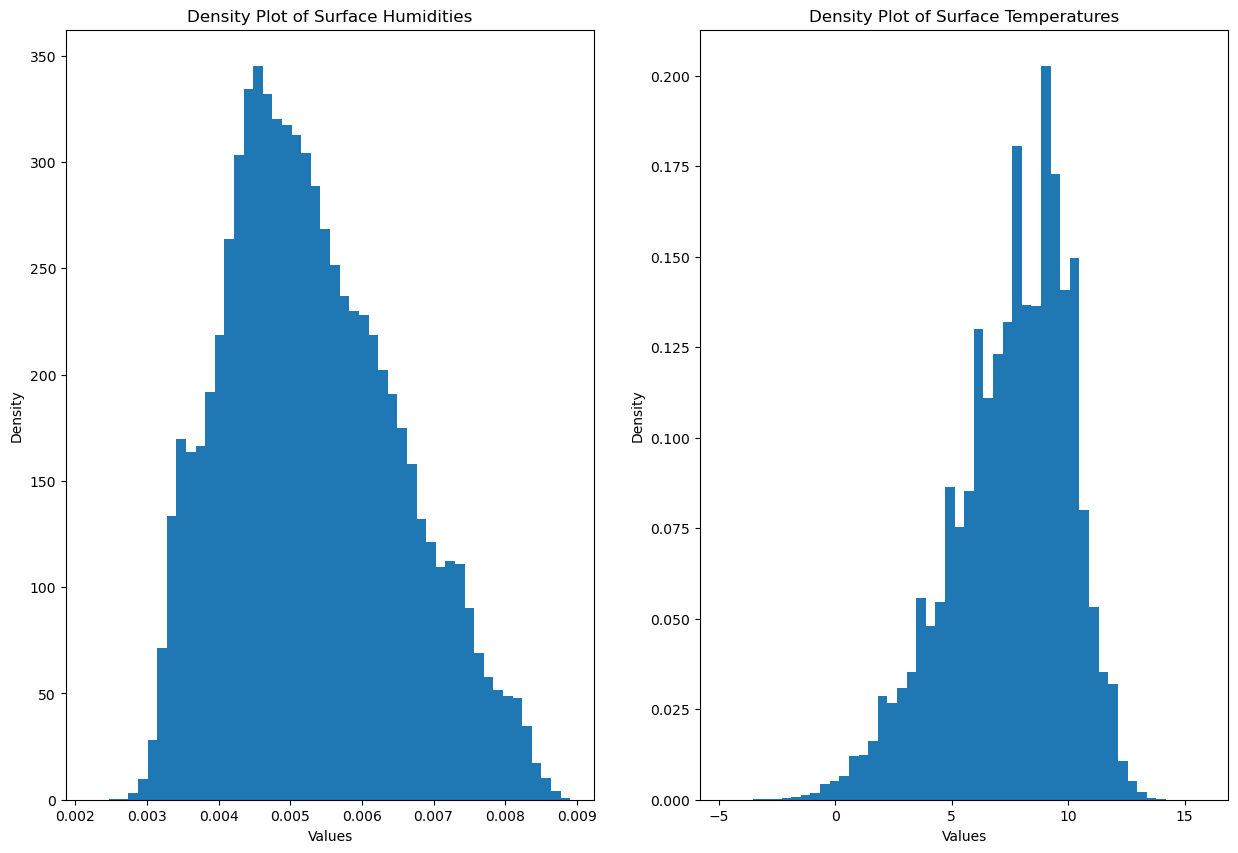

In [8]:
surface_humidities = data[:,0,0]* 0.025
surface_temperatures = data[:,2,0]* 180 + 140 -273.15

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].hist(surface_humidities, bins=50, density=True)
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Density')
axs[0].set_title('Density Plot of Surface Humidities')

axs[1].hist(surface_temperatures, bins=50, density=True)
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Density')
axs[1].set_title('Density Plot of Surface Temperatures')

In [15]:
class_1 = data[surface_humidities<=0.0035]
class_2 = data[(surface_humidities>0.0035) & (surface_humidities<=0.0045) ]
class_3 = data[(surface_humidities>0.0045) & (surface_humidities<=0.0055) ]
class_4 = data[(surface_humidities>0.0055) & (surface_humidities<=0.0065) ]
class_5 = data[(surface_humidities>0.0065) & (surface_humidities<=0.0075) ]
class_6 = data[surface_humidities>0.0075]

In [18]:
print(f'Class 1 shape: {class_1.shape}')
print(f'Class 2 shape: {class_2.shape}')
print(f'Class 3 shape: {class_3.shape}')
print(f'Class 4 shape: {class_4.shape}')
print(f'Class 5 shape: {class_5.shape}')
print(f'Class 6 shape: {class_6.shape}')

Class 1 shape: (250440, 3, 70)
Class 2 shape: (1210730, 3, 70)
Class 3 shape: (1623745, 3, 70)
Class 4 shape: (1164387, 3, 70)
Class 5 shape: (667448, 3, 70)
Class 6 shape: (667448, 3, 70)


In [28]:
random_indices = np.random.choice(class_1.shape[0], 100, replace=False)
trainingdata1 = class_1[random_indices]

random_indices = np.random.choice(class_2.shape[0], 100, replace=False)
trainingdata2 = class_2[random_indices]

random_indices = np.random.choice(class_3.shape[0], 100, replace=False)
trainingdata3 = class_3[random_indices]

random_indices = np.random.choice(class_4.shape[0], 100, replace=False)
trainingdata4 = class_4[random_indices]

random_indices = np.random.choice(class_5.shape[0], 100, replace=False)
trainingdata5 = class_5[random_indices]

random_indices = np.random.choice(class_6.shape[0], 100, replace=False)
trainingdata6 = class_6[random_indices]

Text(0.5, 1.0, 'Humidities: Class 6 \n (Surface Humidity > 0.0075)')

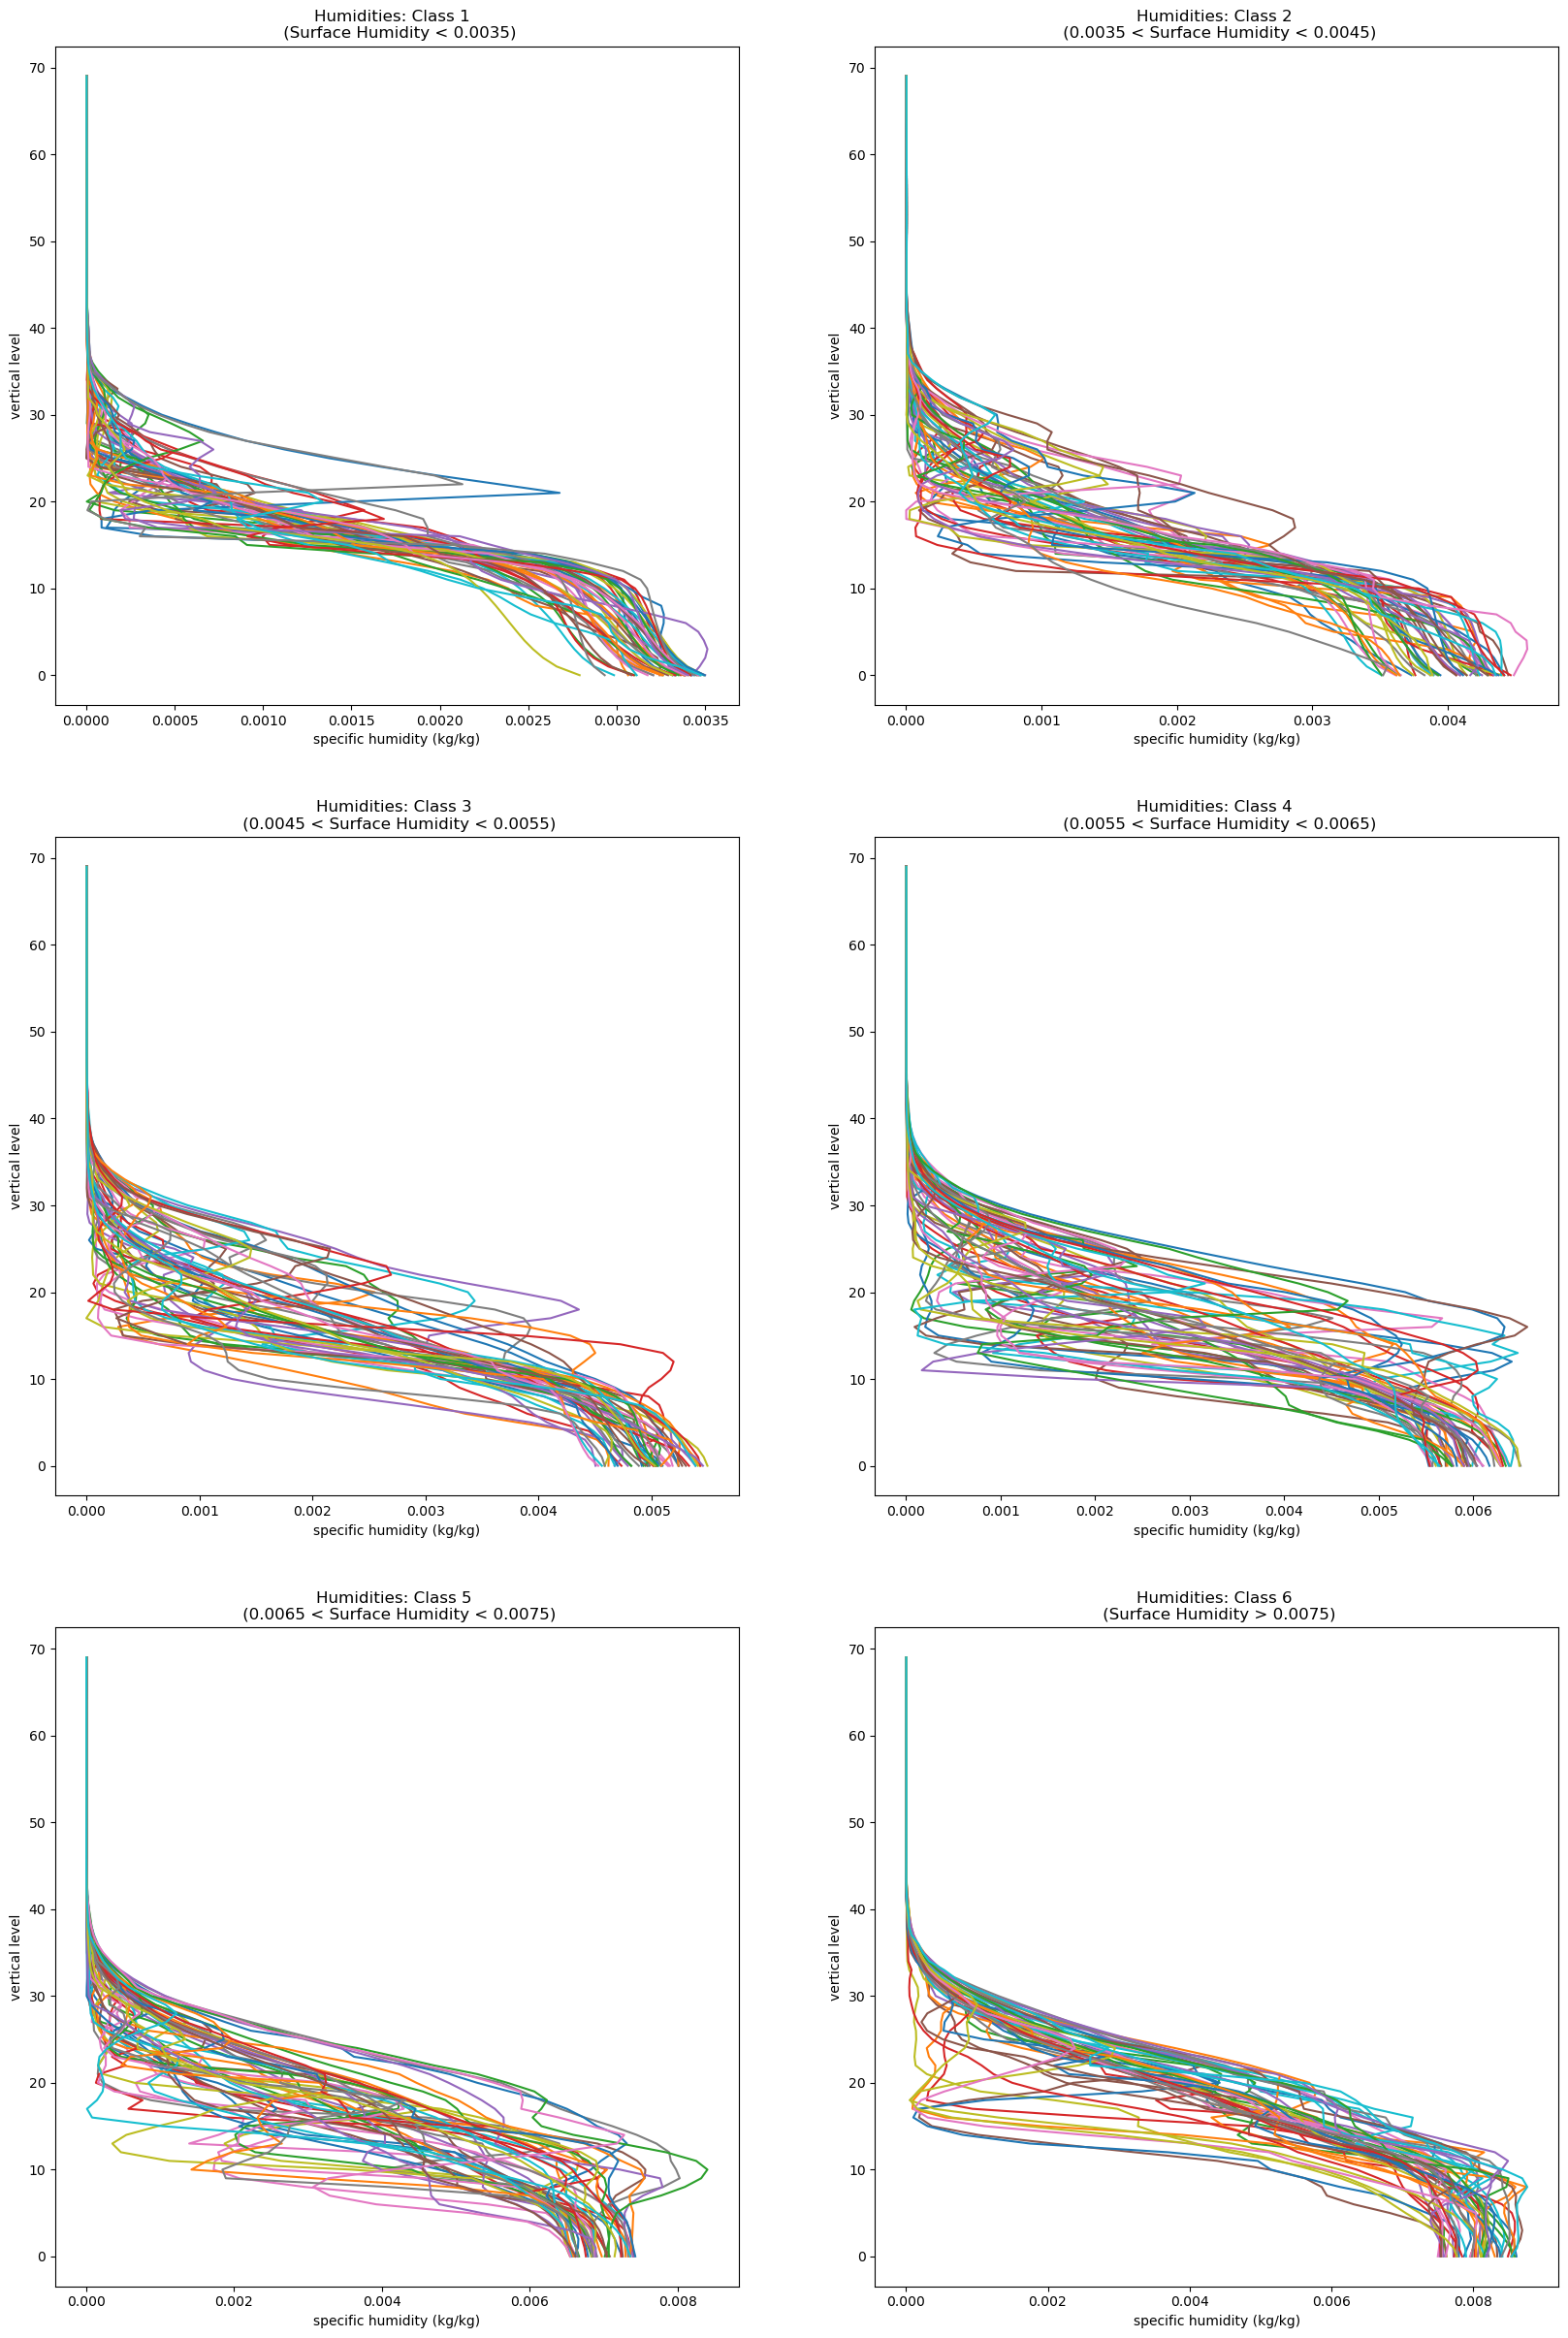

In [30]:

fig, axs = plt.subplots(3, 2, figsize=(20, 30))

humidity1 = trainingdata1[:, 0, :] * 0.025
for i in range(50):
    axs[0,0].plot(humidity1[i], np.arange(70))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Humidities: Class 1  \n (Surface Humidity < 0.0035)") 

humidity2 = trainingdata2[:, 0, :] * 0.025
for i in range(50):
    axs[0,1].plot(humidity2[i], np.arange(70))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Humidities: Class 2 \n (0.0035 < Surface Humidity < 0.0045)") 

humidity3 = trainingdata3[:, 0, :] * 0.025
for i in range(50):
    axs[1,0].plot(humidity3[i], np.arange(70))
axs[1,0].set_xlabel("specific humidity (kg/kg)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Humidities: Class 3 \n (0.0045 < Surface Humidity < 0.0055)") 

humidity4 = trainingdata4[:, 0, :] * 0.025
for i in range(50):
    axs[1,1].plot(humidity4[i], np.arange(70))
axs[1,1].set_xlabel("specific humidity (kg/kg)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Humidities: Class 4 \n (0.0055 < Surface Humidity < 0.0065)") 

humidity5 = trainingdata5[:, 0, :] * 0.025
for i in range(50):
    axs[2,0].plot(humidity5[i], np.arange(70))
axs[2,0].set_xlabel("specific humidity (kg/kg)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Humidities: Class 5 \n (0.0065 < Surface Humidity < 0.0075)") 

humidity6 = trainingdata6[:, 0, :] * 0.025
for i in range(50):
    axs[2,1].plot(humidity6[i], np.arange(70))
axs[2,1].set_xlabel("specific humidity (kg/kg)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Humidities: Class 6 \n (Surface Humidity > 0.0075)") 

In [32]:
class_1 = data[surface_temperatures<=3]
class_2 = data[(surface_temperatures>3) & (surface_temperatures<=6) ]
class_3 = data[(surface_temperatures>6) & (surface_temperatures<=9) ]
class_4 = data[(surface_temperatures>9) & (surface_temperatures<=12) ]
class_5 = data[surface_temperatures>=12]

In [35]:
print(f'Class 1 shape: {class_1.shape}')
print(f'Class 2 shape: {class_2.shape}')
print(f'Class 3 shape: {class_3.shape}')
print(f'Class 4 shape: {class_4.shape}')
print(f'Class 5 shape: {class_5.shape}')

Class 1 shape: (317250, 3, 70)
Class 2 shape: (1008588, 3, 70)
Class 3 shape: (2172256, 3, 70)
Class 4 shape: (1634144, 3, 70)
Class 5 shape: (51762, 3, 70)
Class 6 shape: (51762, 3, 70)


In [36]:
class_1.shape[0] + class_2.shape[0] + class_3.shape[0] + class_4.shape[0] +class_5.shape[0] 

5184000

In [41]:
random_indices = np.random.choice(class_1.shape[0], 100, replace=False)
trainingdata1 = class_1[random_indices]

random_indices = np.random.choice(class_2.shape[0], 100, replace=False)
trainingdata2 = class_2[random_indices]

random_indices = np.random.choice(class_3.shape[0], 100, replace=False)
trainingdata3 = class_3[random_indices]

random_indices = np.random.choice(class_4.shape[0], 100, replace=False)
trainingdata4 = class_4[random_indices]

random_indices = np.random.choice(class_5.shape[0], 100, replace=False)
trainingdata5 = class_5[random_indices]



Text(0.5, 1.0, 'Temperatures: Class 5 \n (Surface Temp > 12)')

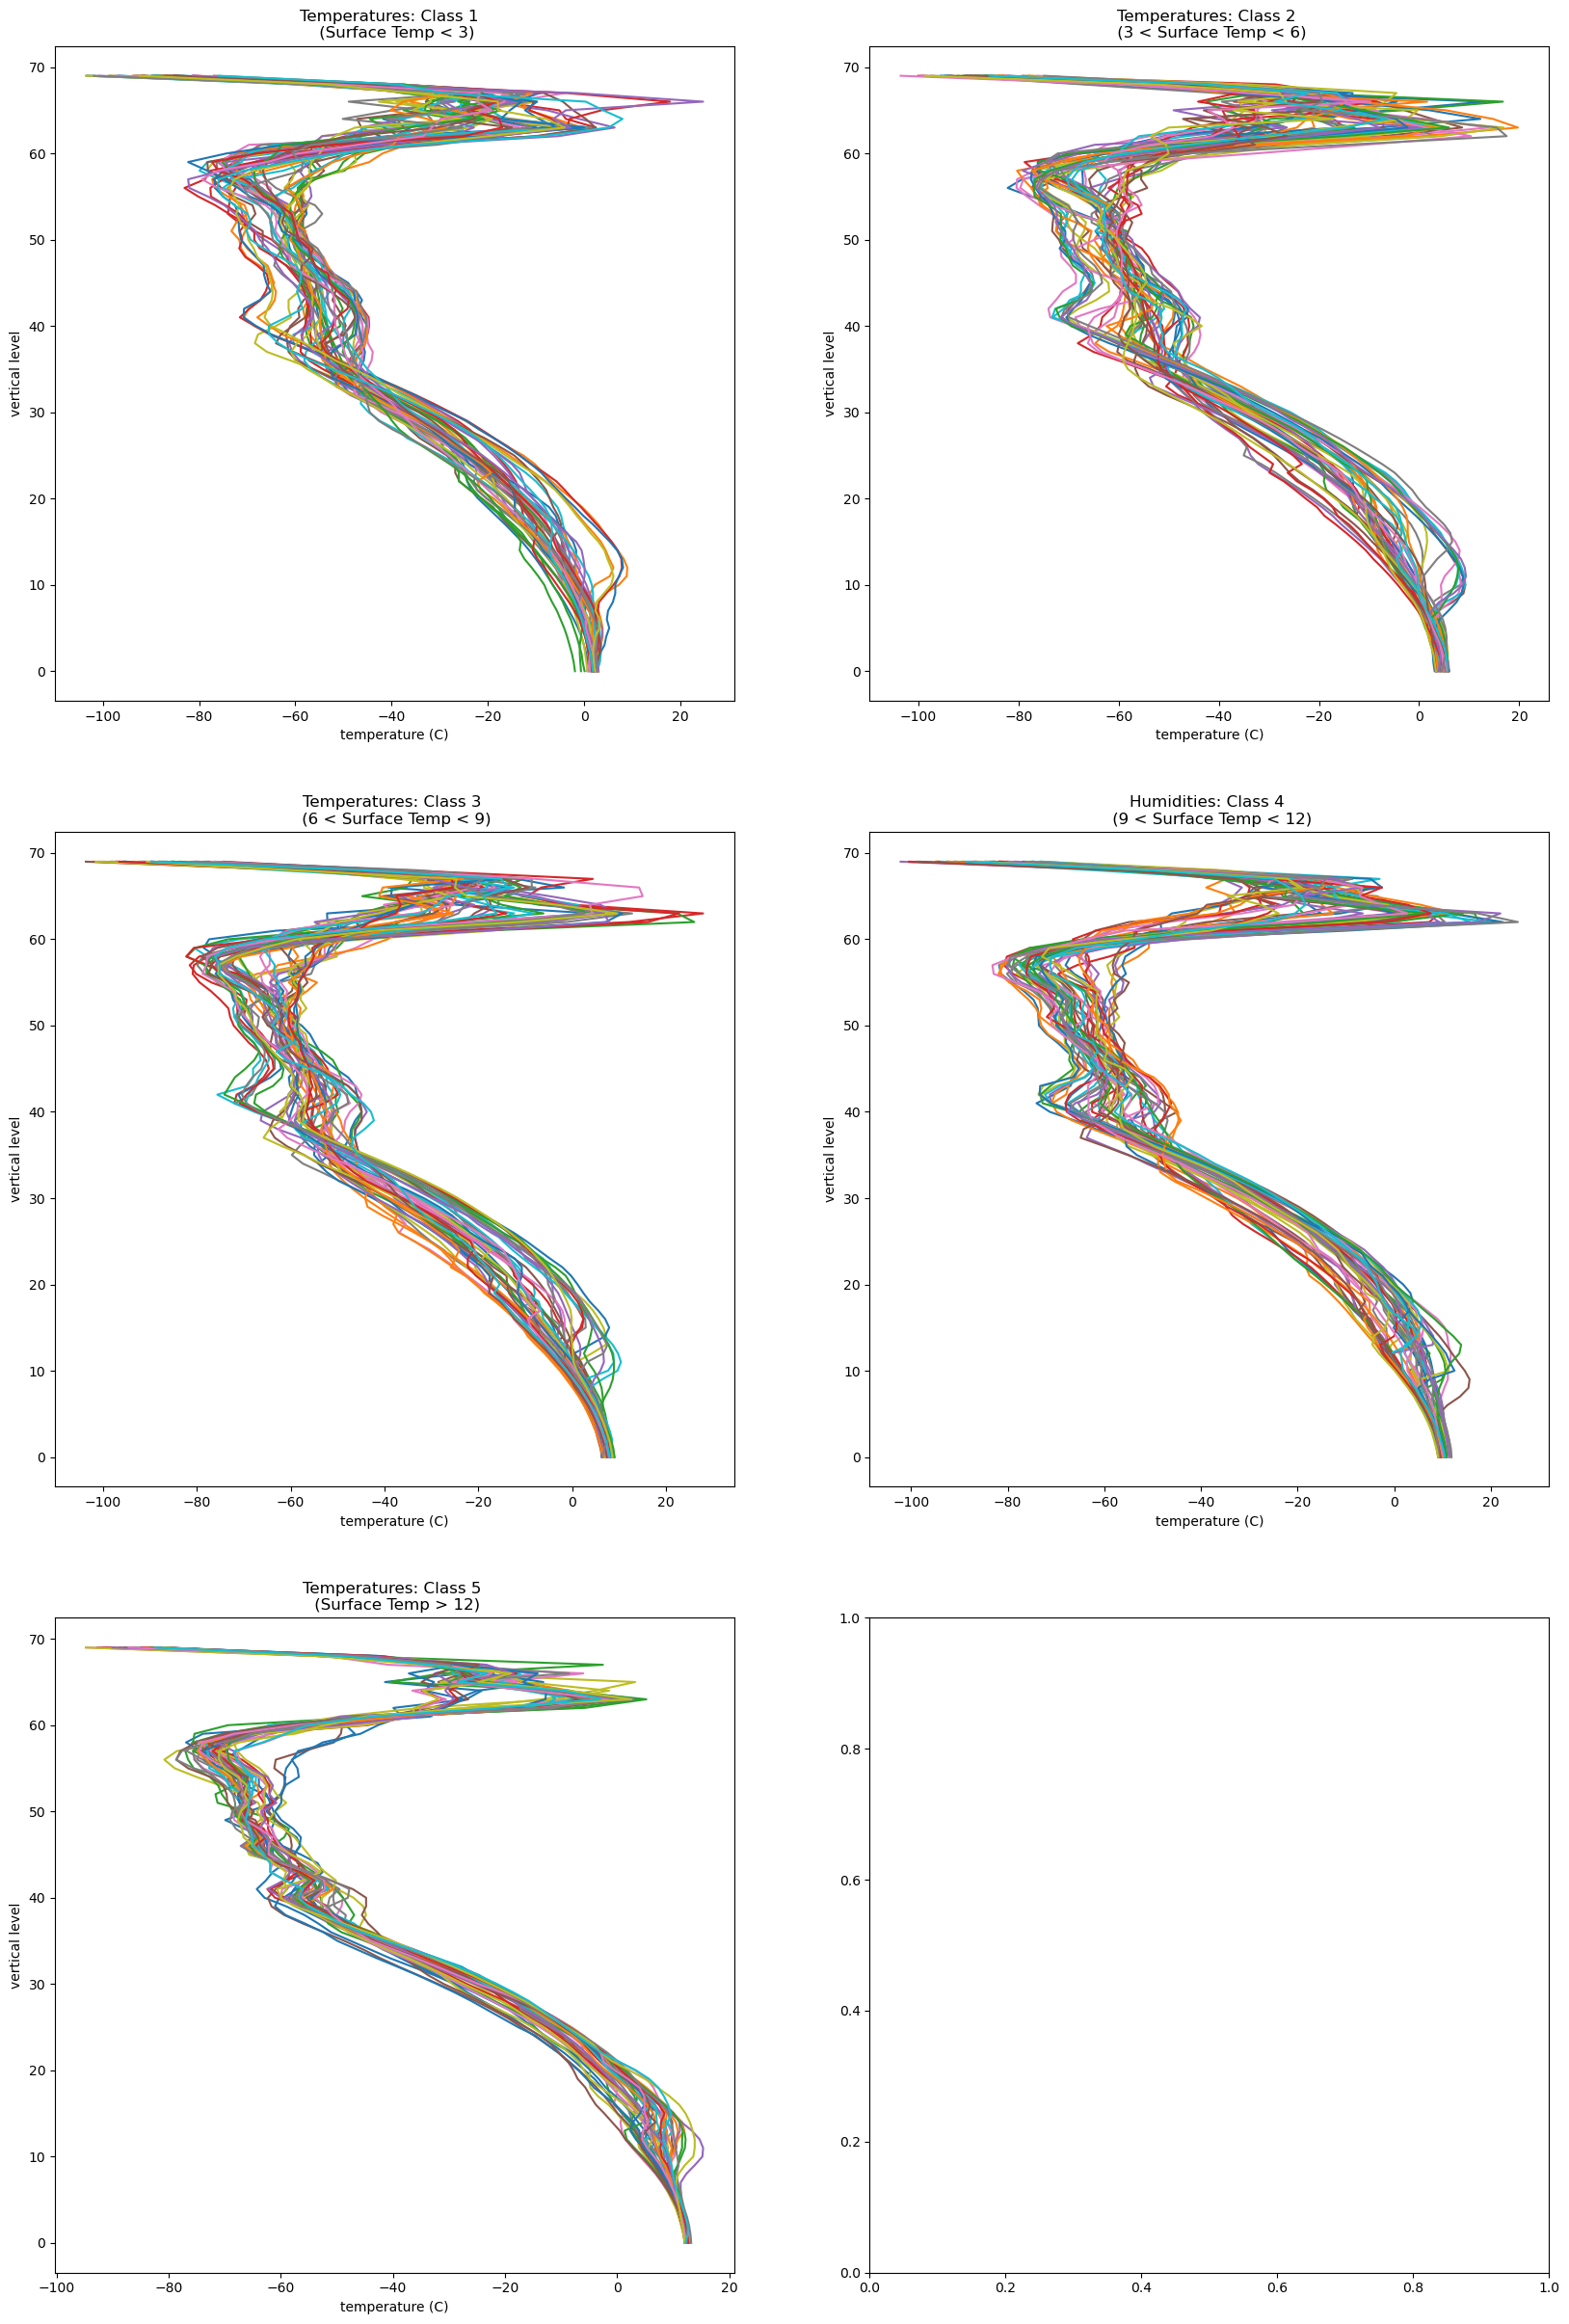

In [42]:

fig, axs = plt.subplots(3, 2, figsize=(20, 30))

temp1 = trainingdata1[:, 2, :]* 180 + 140 -273.15
for i in range(50):
    axs[0,0].plot(temp1[i], np.arange(70))
axs[0,0].set_xlabel("temperature (C)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Temperatures: Class 1  \n (Surface Temp < 3)") 

temp2 = trainingdata2[:, 2, :]* 180 + 140 -273.15
for i in range(50):
    axs[0,1].plot(temp2[i], np.arange(70))
axs[0,1].set_xlabel("temperature (C)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Temperatures: Class 2 \n (3 < Surface Temp < 6)") 

temp3 = trainingdata3[:, 2, :]* 180 + 140 -273.15
for i in range(50):
    axs[1,0].plot(temp3[i], np.arange(70))
axs[1,0].set_xlabel("temperature (C)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Temperatures: Class 3 \n (6 < Surface Temp < 9)") 

temp4 = trainingdata4[:, 2, :]* 180 + 140 -273.15
for i in range(50):
    axs[1,1].plot(temp4[i], np.arange(70))
axs[1,1].set_xlabel("temperature (C)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Humidities: Class 4 \n (9 < Surface Temp < 12)") 

temp5 = trainingdata5[:, 2, :]* 180 + 140 -273.15
for i in range(50):
    axs[2,0].plot(temp5[i], np.arange(70))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Temperatures: Class 5 \n (Surface Temp > 12)") 
